In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import matplotlib.dates as mdates
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
from matplotlib import rcParams

plt.style.use('ggplot')
rcParams['figure.figsize'] = 12, 5
rcParams['pdf.fonttype'] = 3
rcParams['font.size'] = 8
rcParams['axes.linewidth'] = 1

In [3]:
df = pd.read_csv('./../data/weather_dataset_preprocesado.csv')
target_column = 'T (degC)'
target_index = 'datetime'
load = df[target_column]
time = df[target_index]
x_label = 'Time'
y_label = 'Temperature (°C)'

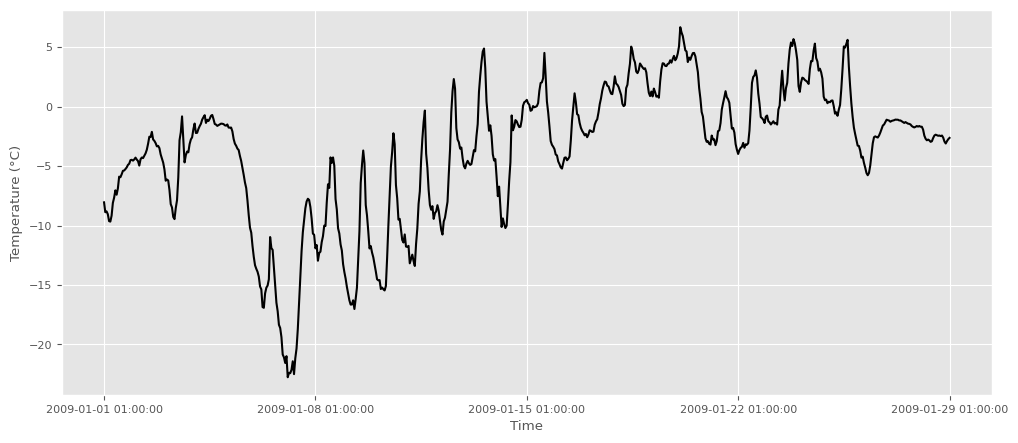

In [4]:
plt.plot(time[:673], load[:673], color='k', label='Real')
plt.xticks(np.arange(0, 673, step = 168))
plt.xlabel(xlabel=x_label)
plt.ylabel(ylabel=y_label)
plt.show()

In [5]:
display(load.describe())

count    50224.000000
mean         9.254321
std          8.625312
min        -22.760000
25%          3.140000
50%          9.450000
75%         15.452500
max         35.650000
Name: T (degC), dtype: float64

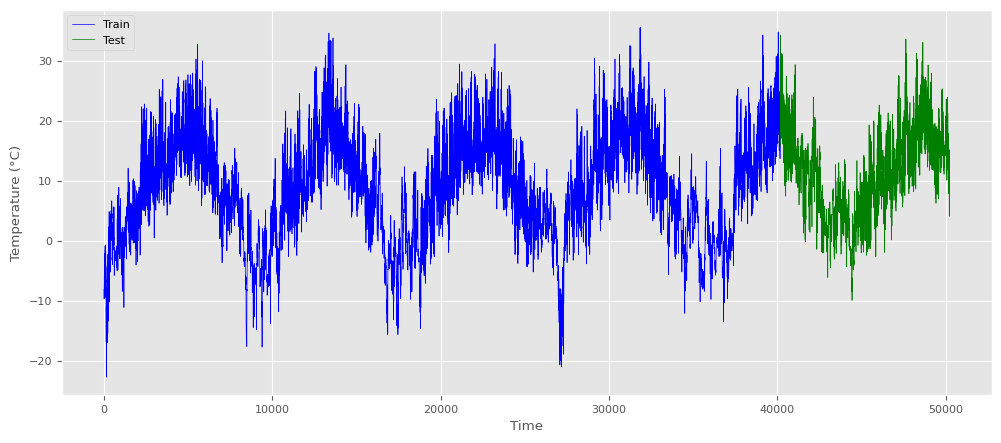

In [6]:
train = load[:int(len(load)*0.8)]
test = load[int(len(load)*0.8):]
plt.plot(train, label='Train', color='b', linewidth=0.5)
plt.plot(test, label='Test', color='g', linewidth=0.5)
plt.xlabel(xlabel=x_label)
plt.ylabel(ylabel=y_label)
plt.legend()
plt.show()

<Figure size 1200x500 with 0 Axes>

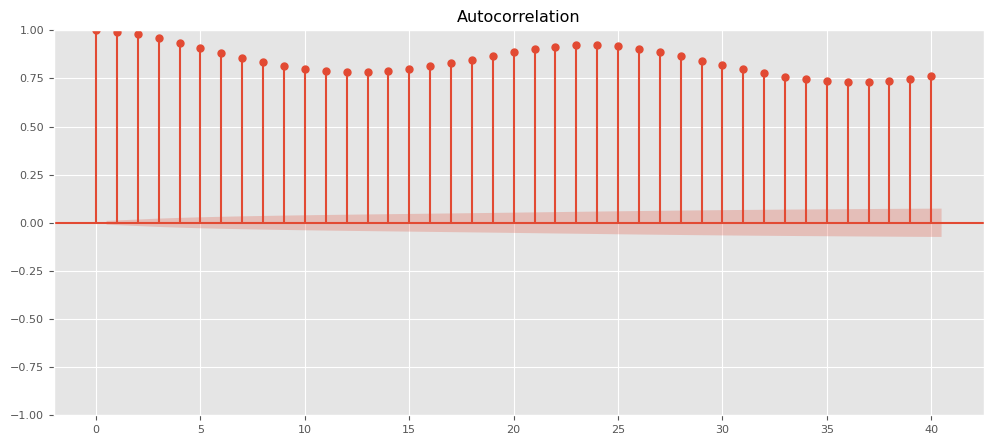

<Figure size 1200x500 with 0 Axes>

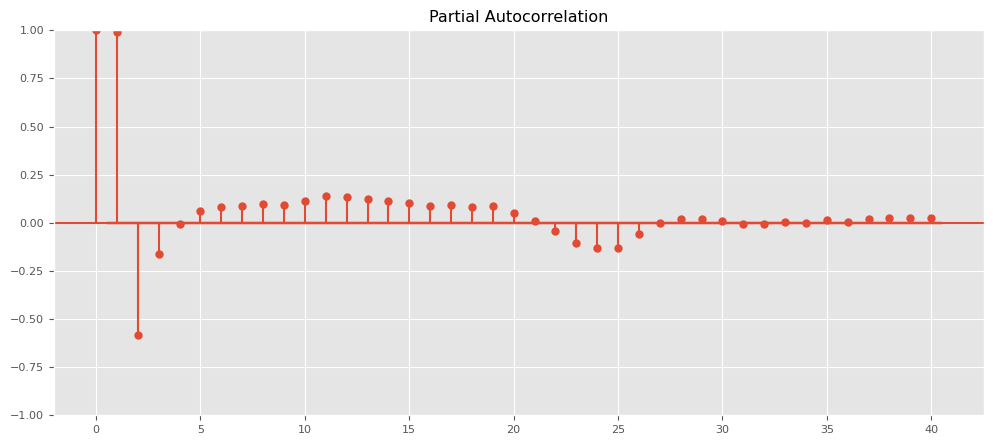

In [7]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure()
acf_values = acf(train)
plot_acf(train, lags=40)
plt.show()

plt.figure()
pacf_values = pacf(train)
plot_pacf(train, lags=40)
plt.show()

In [8]:
df_train = pd.DataFrame(train)
df_test = pd.DataFrame(test)

for i in range(1,4):
    df_train["lag{}".format(i)] = df_train[target_column].shift(i)
    df_test["lag{}".format(i)] = df_test[target_column].shift(i)

df_train = df_train.bfill()
df_train = df_train.drop(columns = [target_column])
df_test = df_test.bfill()
df_test = df_test.drop(columns = [target_column])

display(df_train, df_test)

,lag1,lag2,lag3
0,-8.05,-8.05,-8.05
1,-8.05,-8.05,-8.05
2,-8.88,-8.05,-8.05
3,-8.81,-8.88,-8.05
4,-9.05,-8.81,-8.88
...,...,...,...
40174,22.40,23.72,26.45
40175,20.36,22.40,23.72
40176,19.28,20.36,22.40
40177,18.88,19.28,20.36


,lag1,lag2,lag3
40179,15.89,15.89,15.89
40180,15.89,15.89,15.89
40181,16.37,15.89,15.89
40182,18.50,16.37,15.89
40183,21.14,18.50,16.37
...,...,...,...
50219,13.17,10.36,8.01
50220,13.69,13.17,10.36
50221,14.19,13.69,13.17
50222,14.99,14.19,13.69


# Empirical M Decomposition - SVM¶

In [9]:
!pip install emd

# EEMD

<Axes: xlabel='Time (samples)'>

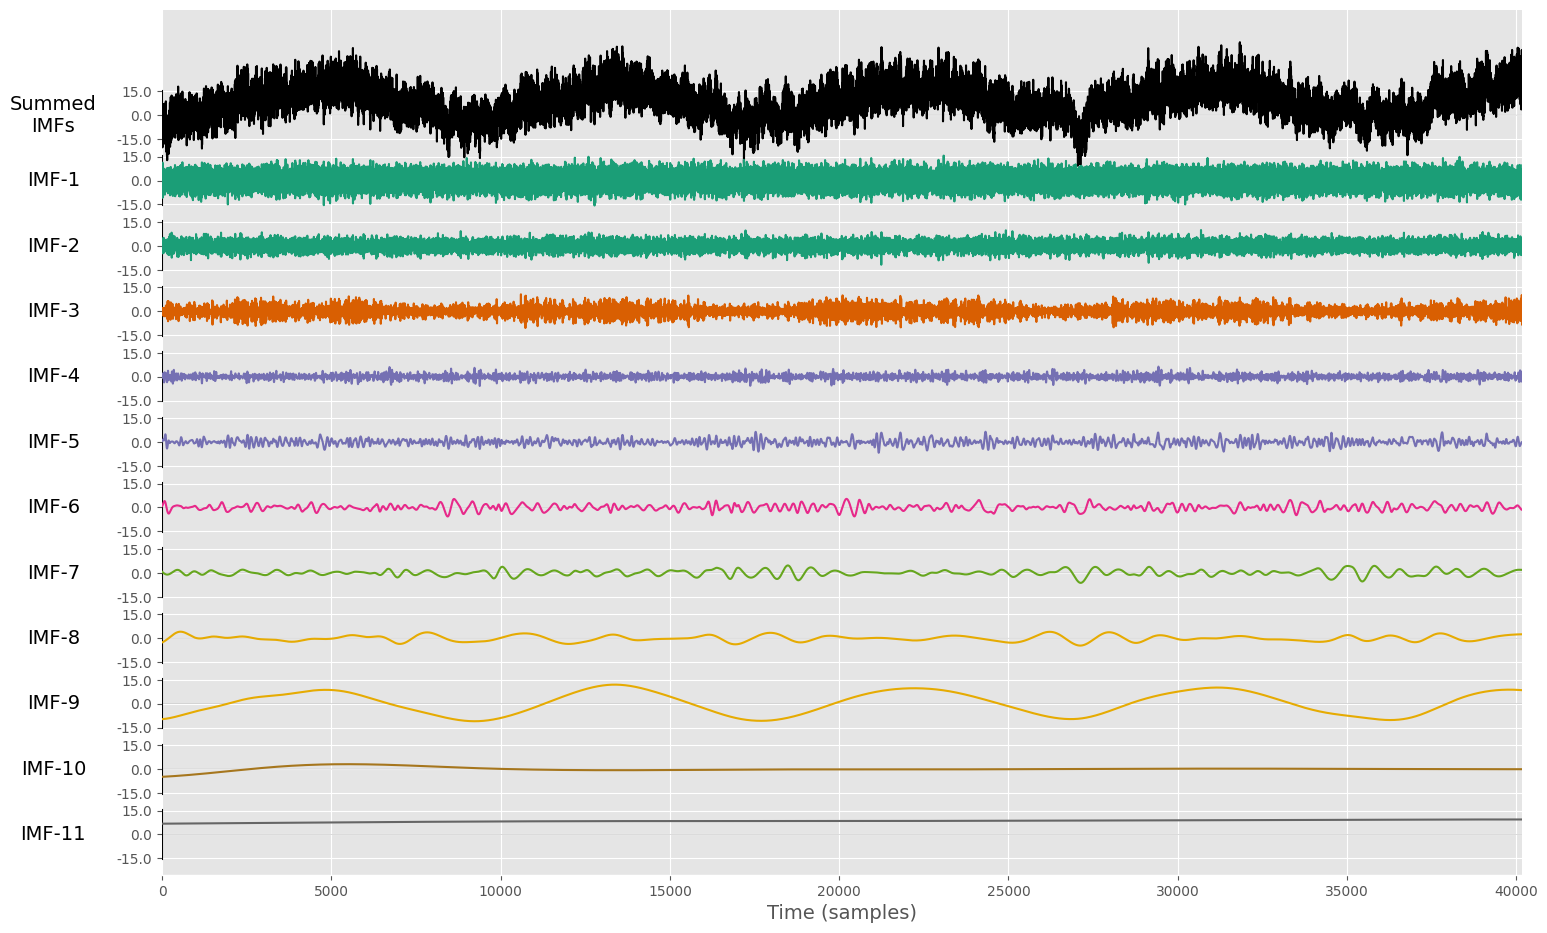

In [10]:
import emd

imf_eemd = emd.sift.ensemble_sift(np.array(train), nensembles=4, nprocesses=6, ensemble_noise=1, imf_opts={'sd_thresh': 0.1})
emd.plotting.plot_imfs(imf_eemd)

In [11]:
imf_eemd_df = pd.DataFrame(data = imf_eemd)
imf_eemd_df.columns = ['imf_eemd_{}'.format(i+1) for i in range(0, imf_eemd.shape[1])]
display(imf_eemd_df)

,imf_eemd_1,imf_eemd_2,imf_eemd_3,imf_eemd_4,imf_eemd_5,imf_eemd_6,imf_eemd_7,imf_eemd_8,imf_eemd_9,imf_eemd_10,imf_eemd_11
0,-1.763627,-0.263524,0.740963,-0.539313,0.570137,1.007146,0.683973,-2.574711,-9.717246,-4.862795,6.747994
1,5.200472,0.598970,0.786522,-0.579319,0.631214,1.034496,0.662270,-2.566144,-9.715412,-4.861687,6.748130
2,-0.368233,0.327973,0.859532,-0.597662,0.693205,1.063672,0.640667,-2.557503,-9.713565,-4.860579,6.748266
3,-2.769064,-0.850155,0.928474,-0.593063,0.755401,1.094653,0.619164,-2.548788,-9.711707,-4.859470,6.748402
4,-2.897999,-1.126654,0.901755,-0.564498,0.817347,1.127419,0.597762,-2.540000,-9.709835,-4.858359,6.748538
...,...,...,...,...,...,...,...,...,...,...,...
40174,-1.000851,-0.545363,-5.505427,3.228779,0.057133,-1.466763,1.885302,2.513579,8.453884,-0.099424,9.386271
40175,-1.007918,-1.435530,-6.977525,3.230117,0.060836,-1.467920,1.883886,2.514079,8.452163,-0.099431,9.386270
40176,-1.416843,-2.300231,-7.991962,3.209701,0.062698,-1.468334,1.882470,2.514576,8.450437,-0.099438,9.386268
40177,3.155649,-2.807679,-8.503545,3.172432,0.062650,-1.468006,1.881053,2.515070,8.448707,-0.099444,9.386267


In [36]:
# from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

imf_arima_models = []
imf_arima_forecasts = []

for i in range(imf_eemd.shape[1]):
    imf_series = imf_eemd_df['imf_eemd_{}'.format(i+1)]
        
    auto_arima_model = auto_arima(imf_series,
                              start_p=1, start_q=1,
                              max_p=1, max_q=1,
                              seasonal=True,
                            #   m=12,  # Periodo de estacionalidad
                              start_P=0, start_Q=0,
                              max_P=1, max_Q=1,
                              d=1, D=1,
                              trace=True,
                              error_action='ignore',
                              suppress_warnings=True,
                              stepwise=True)
    
    # auto_arima_model = auto_arima(imf_series,
    #                           start_p=1, start_q=1,
    #                           max_p=5, max_q=5,
    #                           seasonal=True,
    #                         #   m=12,  # Periodo de estacionalidad
    #                           start_P=0, start_Q=0,
    #                           max_P=5, max_Q=5,
    #                           d=1, D=1,
    #                           trace=True,
    #                           error_action='ignore',
    #                           suppress_warnings=True,
    #                           stepwise=True)
    
    model = auto_arima_model.fit(imf_eemd_df[[imf_series]]) #train imf_series)
    imf_arima_models.append(model)
    forecast, conf_int = model.predict(n_periods=len(imf_series), return_conf_int=True, alpha=0.05)
    # forecast = model.predict(n_periods=len(imf_series), return_conf_int=True,
    # freq = 'H',
    # alpha=0.05)
    imf_arima_forecasts.append(forecast)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=20.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=270131.723, Time=0.70 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=253751.499, Time=0.85 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=19.94 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=270129.723, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=253749.500, Time=0.44 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=11.97 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=4.24 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 59.395 seconds


KeyError: "None of [Index([(-1.7636274467818922, 5.200471819271757, -0.3682330728042265, -2.7690637708872856, -2.8979994398544373, -0.582590107629858, -4.901797930006625, 8.239020630966662, -3.2189623289679656, 1.5111012115865476, -10.844876905879568, 11.221941552090206, 7.626944529284166, -1.406178335221245, -4.482958866879071, 4.229803572597468, -2.1709617596561483, -1.623235267914471, -0.5053276585959864, 7.877160639009891, -5.692614089850104, 0.672575165001803, 4.666361516357486, -0.42469684699379656, -0.2915979875452015, 2.1053101065864683, -5.849132078048364, -4.910617423858831, -0.6308696928821597, 7.933971068396102, -7.441377715979936, 6.629795692929226, -7.576849324318833, -2.9314920720435578, -5.965872235062616, 5.6215109395002685, -6.550195074784785, -0.8569838461265261, 7.491959604718088, 6.327130750925093, -5.365716328766488, -4.229196588776877, -1.5349241328217973, -2.6443961225602615, 6.480106768126201, -0.8321137378015898, -2.7325773769941857, 0.04651132670199173, -1.4774261225107288, -0.019979214347931224, 1.3616053991819907, 1.4488344713033656, 2.5577280806109877, -1.7682472919488583, 1.5765344034769366, -0.5450671696239683, 1.795860042060778, -5.555266816838233, 6.980067310144037, -4.438881047976373, -2.3434090915215493, -4.022387477848637, 5.287509173986989, 0.7884056404296595, 3.198230602692701, -0.393333073234043, -1.1758054296306901, 3.9076318552065565, -4.312306185010157, -0.3700444599128521, 0.0973189689442145, 2.466351323197807, -4.275317899946022, 1.76094966760931, 1.0406357123116188, -2.63753757025674, -1.8486740650393738, 2.33963448453049, 4.513738345547116, -8.853806451776029, 1.6047995832951265, 1.130217425565461, -2.261244482709572, 0.6610426637596317, -5.453556229390306, 4.106691516207248, 0.6875109696175059, 4.5538261419818475, 6.437563091636988, -0.546351659290582, 3.414009829825068, -4.026029008136176, 1.416096362180099, 5.723210298805614, -3.127914535194171, -0.816070641741684, -3.417555295048309, -0.1211714474800137, 3.3377271369704324, -1.462722459536656, ...)], dtype='object')] are in the [columns]"

In [13]:
# imf1_eemd_SVR = SVR(kernel = 'rbf', C= 10, gamma= 0.01)
# imf1_eemd_SVR.fit(df_train.values, imf_eemd_df['imf_eemd_1'])
# imf1_eemd_SVR_fc = imf1_eemd_SVR.predict(np.array(df_test))

# imf2_eemd_SVR = SVR(kernel = 'rbf', C= 10, gamma= 0.01)
# imf2_eemd_SVR.fit(df_train.values, imf_eemd_df['imf_eemd_2'])
# imf2_eemd_SVR_fc = imf2_eemd_SVR.predict(np.array(df_test))

# imf3_eemd_SVR = SVR(kernel = 'rbf', C= 10, gamma= 0.01)
# imf3_eemd_SVR.fit(df_train.values, imf_eemd_df['imf_eemd_3'])
# imf3_eemd_SVR_fc = imf3_eemd_SVR.predict(np.array(df_test))

# imf4_eemd_SVR = SVR(kernel = 'rbf', C= 10, gamma= 0.01)
# imf4_eemd_SVR.fit(df_train.values, imf_eemd_df['imf_eemd_4'])
# imf4_eemd_SVR_fc = imf4_eemd_SVR.predict(np.array(df_test))

# imf5_eemd_SVR = SVR(kernel = 'rbf', C= 10, gamma= 0.01)
# imf5_eemd_SVR.fit(df_train.values, imf_eemd_df['imf_eemd_5'])
# imf5_eemd_SVR_fc = imf5_eemd_SVR.predict(np.array(df_test))

# imf6_eemd_SVR = SVR(kernel = 'rbf', C= 10, gamma= 0.01)
# imf6_eemd_SVR.fit(df_train.values, imf_eemd_df['imf_eemd_6'])
# imf6_eemd_SVR_fc = imf6_eemd_SVR.predict(np.array(df_test))

# imf7_eemd_SVR = SVR(kernel = 'rbf', C= 10, gamma= 0.01)
# imf7_eemd_SVR.fit(df_train.values, imf_eemd_df['imf_eemd_7'])
# imf7_eemd_SVR_fc = imf7_eemd_SVR.predict(np.array(df_test))

# imf8_eemd_SVR = SVR(kernel = 'rbf', C= 10, gamma= 0.01)
# imf8_eemd_SVR.fit(df_train.values, imf_eemd_df['imf_eemd_8'])
# imf8_eemd_SVR_fc = imf8_eemd_SVR.predict(np.array(df_test))

# imf9_eemd_SVR = SVR(kernel = 'rbf', C= 10, gamma= 0.01)
# imf9_eemd_SVR.fit(df_train.values, imf_eemd_df['imf_eemd_9'])
# imf9_eemd_SVR_fc = imf9_eemd_SVR.predict(np.array(df_test))

# imf10_eemd_SVR = SVR(kernel = 'rbf', C= 10, gamma= 0.01)
# imf10_eemd_SVR.fit(df_train.values, imf_eemd_df['imf_eemd_10'])
# imf10_eemd_SVR_fc = imf10_eemd_SVR.predict(np.array(df_test))

# # imf11_eemd_SVR = SVR(kernel = 'rbf', C= 10, gamma= 0.01)
# # imf11_eemd_SVR.fit(df_train.values, imf_eemd_df['imf_eemd_11'])
# # imf11_eemd_SVR_fc = imf11_eemd_SVR.predict(np.array(df_test))

In [20]:
imf_arima_forecasts_df = pd.DataFrame(data = imf_arima_forecasts)

In [26]:
imf_arima_forecasts_df.columns = ['imf_arima_{}'.format(i+1) for i in range(0, imf_arima_forecasts_df.shape[1])]

In [33]:
imf_arima_forecasts

[40179    5.824846
 40180    7.946184
 40181    6.718638
 40182    7.428977
 40183    7.017928
            ...   
 80353    7.168600
 80354    7.168600
 80355    7.168600
 80356    7.168600
 80357    7.168600
 Length: 40179, dtype: float64,
 40179   -2.913014
 40180   -2.869561
 40181   -2.847941
 40182   -2.837185
 40183   -2.831833
            ...   
 80353   -2.826533
 80354   -2.826533
 80355   -2.826533
 80356   -2.826533
 80357   -2.826533
 Length: 40179, dtype: float64,
 40179   -8.202275
 40180   -7.941809
 40181   -7.696110
 40182   -7.464341
 40183   -7.245712
            ...   
 80353   -3.608146
 80354   -3.608146
 80355   -3.608146
 80356   -3.608146
 80357   -3.608146
 Length: 40179, dtype: float64,
 40179    3.061590
 40180    3.001798
 40181    2.942813
 40182    2.884626
 40183    2.827224
            ...   
 80353   -1.364244
 80354   -1.364244
 80355   -1.364244
 80356   -1.364244
 80357   -1.364244
 Length: 40179, dtype: float64,
 40179    0.060705
 40180    0.06070

In [18]:
# Si necesitas asignar las predicciones a variables individuales 
imf1_eemd_ARIMA_fc, imf2_eemd_ARIMA_fc, imf3_eemd_ARIMA_fc, imf4_eemd_ARIMA_fc, imf5_eemd_ARIMA_fc, imf6_eemd_ARIMA_fc, imf7_eemd_ARIMA_fc, imf8_eemd_ARIMA_fc, imf9_eemd_ARIMA_fc, imf10_eemd_ARIMA_fc = imf_arima_forecasts

ValueError: too many values to unpack (expected 10)

In [28]:
imf_eemd_list = ['imf{}_eemd_SVR_fc'.format(i) for i in range(1,11)]

imf_eemd_fc = np.sum(imf_arima_forecasts, axis=0)

In [34]:
imf_eemd_fc.shape

(40179,)

In [31]:
test.values.shape

(10045,)

In [14]:
# imf_eemd_list = ['imf{}_eemd_SVR_fc'.format(i) for i in range(1,11)]

# imf_eemd_fc = np.sum([imf1_eemd_SVR_fc, imf2_eemd_SVR_fc, imf3_eemd_SVR_fc,
#                 imf4_eemd_SVR_fc, imf5_eemd_SVR_fc,imf6_eemd_SVR_fc,
#                 imf7_eemd_SVR_fc,imf8_eemd_SVR_fc,imf9_eemd_SVR_fc, imf10_eemd_SVR_fc], axis = 0)

In [ ]:
plt.plot(imf_eemd_fc,label = 'predict', color = 'r', linewidth = 0.5)
plt.plot(test.values, label = 'actual', color = 'k', linewidth = 0.5)
plt.legend()
plt.savefig('EEMDSVR')
plt.show()

RMSE_EEMD_SVR = mean_squared_error(test, imf_eemd_fc)
MAE_EEMD_SVR  =mean_absolute_error(test, imf_eemd_fc)
MAPE_EEMD_SVR = mean_absolute_percentage_error(test, imf_eemd_fc)
print('RMSE = {}'.format(RMSE_EEMD_SVR), '\nMAE = {}'.format(MAE_EEMD_SVR), '\nMAPE = {}'.format(MAPE_EEMD_SVR))

In [ ]:
plt.plot(imf_eemd_fc[:200], label = 'predict', color = 'r', linewidth = 0.5)
plt.plot(test[:200].values, label = 'actual', color = 'k', linewidth = 0.5)
plt.legend()
plt.savefig('EEMDSVR_200')
plt.show()

RMSE_EEMD_SVR = mean_squared_error(test, imf_eemd_fc)
MAE_EEMD_SVR  =mean_absolute_error(test, imf_eemd_fc)
MAPE_EEMD_SVR = mean_absolute_percentage_error(test, imf_eemd_fc)
print('MSE = {}'.format(RMSE_EEMD_SVR), '\nMAE = {}'.format(MAE_EEMD_SVR), '\nMAPE = {}'.format(MAPE_EEMD_SVR))

In [18]:
# imf1_eemd_SVR_fc = imf1_eemd_SVR.predict(np.array(df_train))
# imf2_eemd_SVR_fc = imf2_eemd_SVR.predict(np.array(df_train))
# imf3_eemd_SVR_fc = imf3_eemd_SVR.predict(np.array(df_train))
# imf4_eemd_SVR_fc = imf4_eemd_SVR.predict(np.array(df_train))
# imf5_eemd_SVR_fc = imf5_eemd_SVR.predict(np.array(df_train))
# imf6_eemd_SVR_fc = imf6_eemd_SVR.predict(np.array(df_train))
# imf7_eemd_SVR_fc = imf7_eemd_SVR.predict(np.array(df_train))
# imf8_eemd_SVR_fc = imf8_eemd_SVR.predict(np.array(df_train))
# imf9_eemd_SVR_fc = imf9_eemd_SVR.predict(np.array(df_train))
# imf10_eemd_SVR_fc = imf10_eemd_SVR.predict(np.array(df_train))
# # imf11_eemd_SVR_fc = imf11_eemd_SVR.predict(np.array(df_train))

# imf_eemd_fc_train = np.sum([imf1_eemd_SVR_fc, imf2_eemd_SVR_fc, imf3_eemd_SVR_fc,
#                 imf4_eemd_SVR_fc, imf5_eemd_SVR_fc,imf6_eemd_SVR_fc,
#                 imf7_eemd_SVR_fc,imf8_eemd_SVR_fc,imf9_eemd_SVR_fc, imf10_eemd_SVR_fc], axis = 0)

In [ ]:
from scipy.optimize import minimize

def dummy1(c):
    global train
    global imf_eemd_fc_train
    return mean_squared_error(train, imf_eemd_fc_train + c)

res1 = minimize(dummy1, 0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})
print(res1.x)

In [ ]:
RMSE_EEMD_SVR = mean_squared_error(test, imf_eemd_fc + res1.x[0])
MAE_EEMD_SVR  =mean_absolute_error(test, imf_eemd_fc + res1.x[0])
MAPE_EEMD_SVR = mean_absolute_percentage_error(test, imf_eemd_fc + res1.x[0])
print('RMSE = {}'.format(RMSE_EEMD_SVR), '\nMAE = {}'.format(MAE_EEMD_SVR), '\nMAPE = {}'.format(MAPE_EEMD_SVR))

In [ ]:
plt.plot(imf_eemd_fc + res1.x[0], label = 'predict', color = 'r', linewidth = 0.5)
plt.plot(test.values, label = 'actual', color = 'k', linewidth = 0.5)
plt.legend()
plt.savefig('ImprovedEEMDSVR')
plt.show()

In [ ]:
plt.plot(imf_eemd_fc[:200] + res1.x[0], label = 'predict', color = 'r', linewidth = 0.5)
plt.plot(test.values[:200], label = 'actual', color = 'k', linewidth = 0.5)
plt.legend()
plt.savefig('ImprovedEEMDSVR_200')
plt.show()

In [ ]:
# plt.plot(arima_fc.values[:200], label = 'ARIMA')
# plt.plot(arima_SVR_fc[:200]+arima_fc.values[:200], label = 'ARIMA-SVM')
# plt.plot(hw_fc.values[:200], label = 'HW')
# plt.plot(hw_SVR_fc[:200]+hw_fc.values[:200], label = 'HW-SVM')
# plt.plot(SVR_fc[:200], label = 'SVM')
# plt.plot(SVR_MA_3_fc[0:200], label = 'SMA-SVM')
# plt.plot(imf_fc[:200], label = 'EMD-SVM')
# plt.plot(imf_fc[:200] + res.x[0], label = 'Improved EMD-SVM')
plt.plot(imf_eemd_fc[:200], label = 'EEMD-SVM', linewidth = 0.5)
plt.plot(imf_eemd_fc[:200] + res1.x[0], label = 'Improved EEMD-SVM', linewidth = 0.5)
plt.plot(test.values[:200], label = 'Actual', color = 'k', linewidth = 1) 
plt.legend()
plt.savefig('Summary')
plt.show()